#  1) Fraud Check 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
fraud=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Decision Tree\Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud['Undergrad']=preprocessing.LabelEncoder().fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=preprocessing.LabelEncoder().fit_transform(fraud['Marital.Status'])
fraud['Urban']=preprocessing.LabelEncoder().fit_transform(fraud['Urban'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [5]:

# To replce income with status risky or good

for i in range (len(fraud['Taxable.Income'])):
    if fraud['Taxable.Income'][i] <=30000: 
        fraud['Taxable.Income'][i]="Risky"
    else:
        fraud['Taxable.Income'][i]="Good"


C:\Users\Dell\AppData\Local\Temp/ipykernel_23480/3500000312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Taxable.Income'][i]="Good"
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [7]:
fraud.rename(columns={'Marital.Status':'MStatus','Taxable.Income':'Status','City.Population':'Population',
                        'Work.Experience':'Experience' },inplace=True)
fraud

,Undergrad,MStatus,Status,Population,Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [8]:
fraud['Status']=preprocessing.LabelEncoder().fit_transform(fraud['Status'])
fraud

,Undergrad,MStatus,Status,Population,Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [9]:
x=fraud.iloc[:,[0,1,3,4,5]]
y=fraud['Status']
y.value_counts()
x

,Undergrad,MStatus,Population,Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [10]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
np.shape(y_train)

(480,)

# Building Decision Tree Classifier (C5.0) using Entropy Criteria

In [11]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.40000000000003, 190.26, 'X[2] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(100.44000000000001, 135.9, 'X[3] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(66.96000000000001, 81.53999999999999, 'X[2] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(234.36, 135.9, 'X[2] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'X[2] <= 130296.0\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.813\nsamples = 203\nvalue = [152, 51]'),
 Text

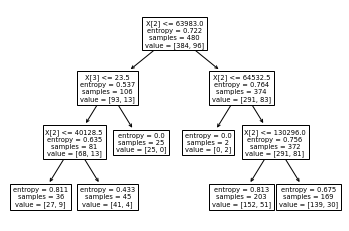

In [12]:
tree.plot_tree(model)

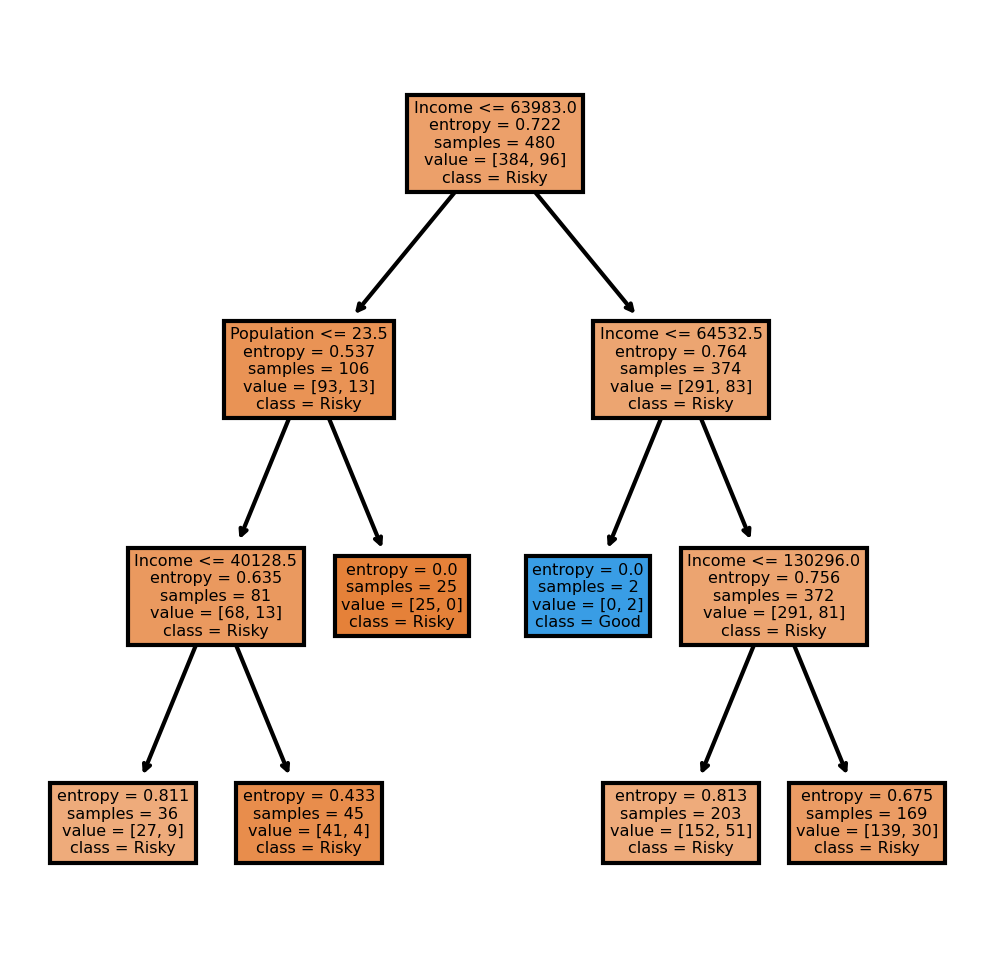

In [13]:
fn = ['Undergrad', 'Status', 'Income', 'Population', 'Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [14]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [15]:
pd.crosstab(y_test,preds)

col_0,0
Status,
0,92
1,28


In [16]:
model.score(x_train,y_train)

0.8041666666666667

In [17]:
# accuracy
np.mean(preds==y_test)

0.7666666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria


In [18]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=40)

In [19]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [20]:
pred=model.predict(x_test)
pd.crosstab(pred,y_test)

Status,0,1
row_0,,
0,92,28


In [21]:
model_gini.score(x_train,y_train)

0.80625

# 2) Company_Data

In [22]:
company=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Decision Tree\\Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [27]:
company['ShelveLoc']=preprocessing.LabelEncoder().fit_transform(company['ShelveLoc'])
company['Urban']=preprocessing.LabelEncoder().fit_transform(company['Urban'])
company['US']=preprocessing.LabelEncoder().fit_transform(company['US'])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [73]:
company['Status'] = company['Sales'].apply(lambda Sales: '1' if Sales <= 7.5 else '0')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [77]:
x=company.iloc[:,1:11]
y=company['Status']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
np.shape(y_train)

(280,)

#  Building Decision Tree Classifier (C5.0) using Entropy Criteria

In [91]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 131.5\nentropy = 0.999\nsamples = 280\nvalue = [146, 134]'),
 Text(83.7, 135.9, 'X[4] <= 89.5\nentropy = 0.96\nsamples = 214\nvalue = [132, 82]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 25.5\nentropy = 0.323\nsamples = 34\nvalue = [32, 2]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.196\nsamples = 33\nvalue = [32, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.991\nsamples = 180\nvalue = [100, 80]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.785\nsamples = 47\nvalue = [11, 36]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.916\nsamples = 133\nvalue = [89, 44]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 146.5\nentropy = 0.746\nsamples = 66\nvalue = [14, 52]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 22.0\nentropy = 0.489\nsamples = 47\nvalue = [5, 42]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.353\

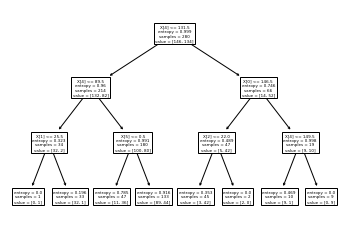

In [92]:
tree.plot_tree(model)

[Text(1162.5, 1981.875, 'Population <= 131.5\nentropy = 0.999\nsamples = 280\nvalue = [146, 134]\nclass = 1'),
 Text(581.25, 1415.625, 'Population <= 89.5\nentropy = 0.96\nsamples = 214\nvalue = [132, 82]\nclass = 1'),
 Text(290.625, 849.375, 'CompPrice <= 25.5\nentropy = 0.323\nsamples = 34\nvalue = [32, 2]\nclass = 1'),
 Text(145.3125, 283.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 0'),
 Text(435.9375, 283.125, 'entropy = 0.196\nsamples = 33\nvalue = [32, 1]\nclass = 1'),
 Text(871.875, 849.375, 'Price <= 0.5\nentropy = 0.991\nsamples = 180\nvalue = [100, 80]\nclass = 1'),
 Text(726.5625, 283.125, 'entropy = 0.785\nsamples = 47\nvalue = [11, 36]\nclass = 0'),
 Text(1017.1875, 283.125, 'entropy = 0.916\nsamples = 133\nvalue = [89, 44]\nclass = 1'),
 Text(1743.75, 1415.625, 'Sales <= 146.5\nentropy = 0.746\nsamples = 66\nvalue = [14, 52]\nclass = 0'),
 Text(1453.125, 849.375, 'Income <= 22.0\nentropy = 0.489\nsamples = 47\nvalue = [5, 42]\nclass = 0'),
 Text(1307.8125, 2

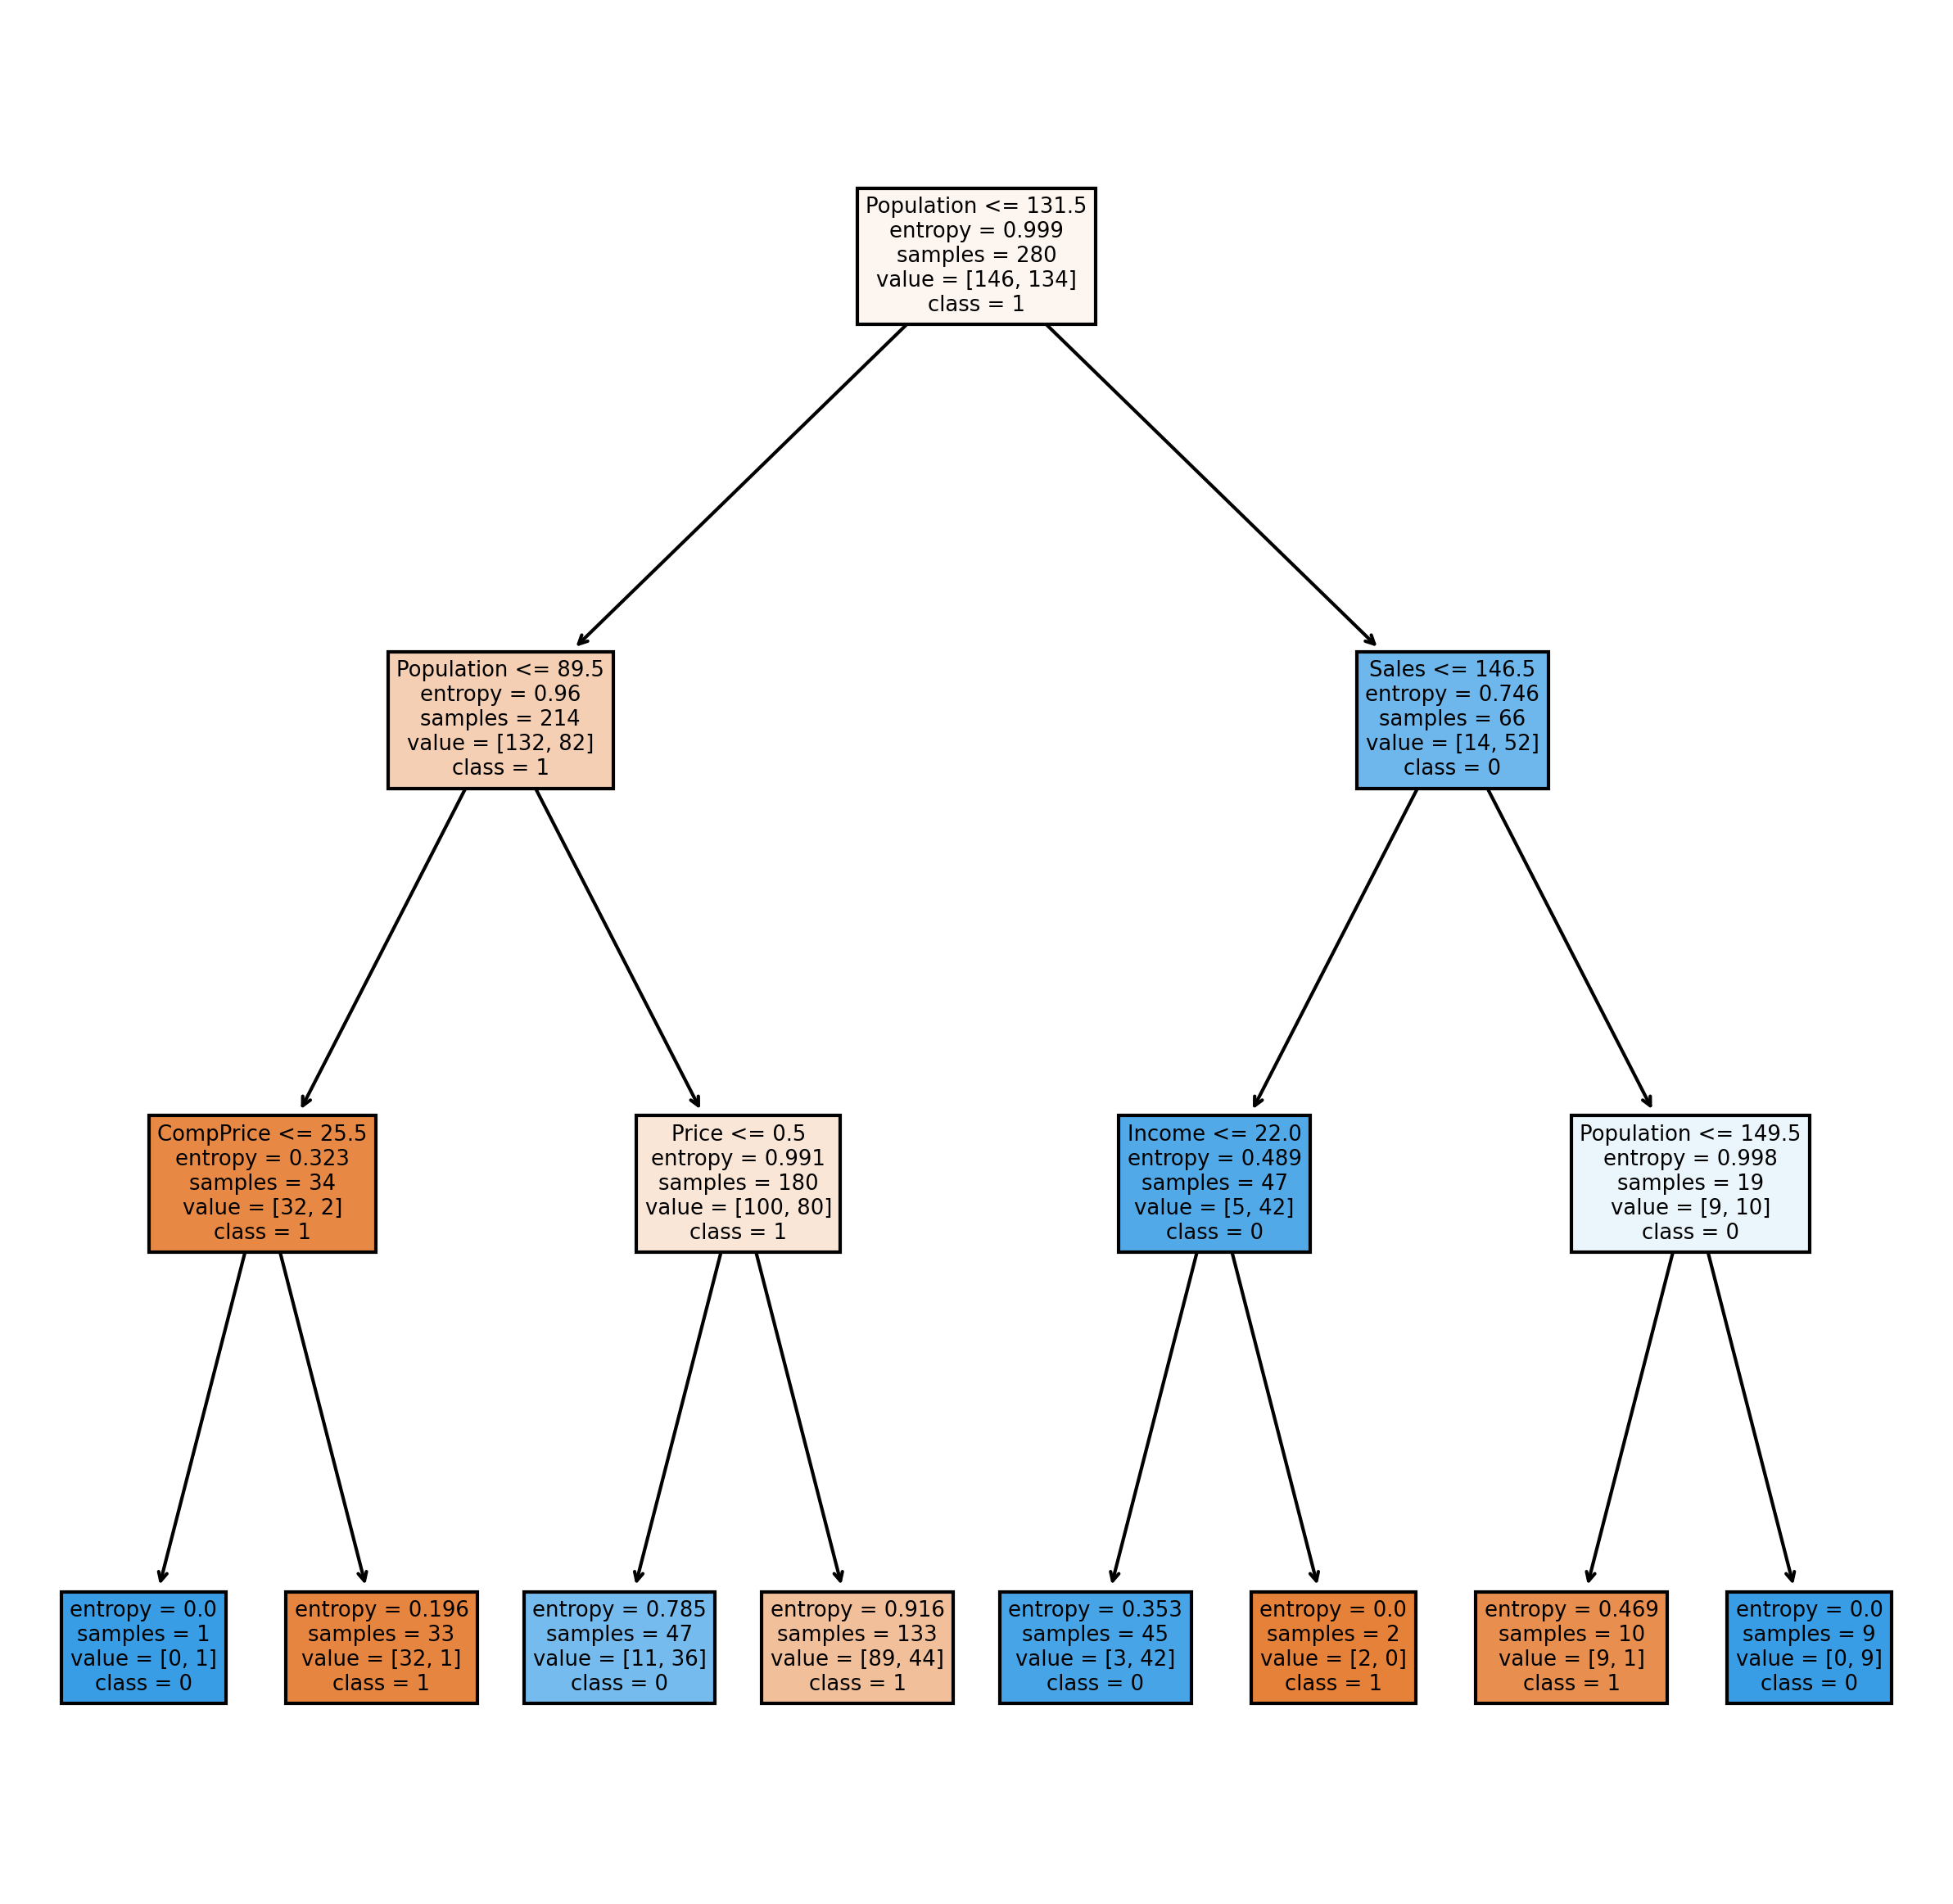

In [101]:
fn = company.columns
cn = ['1','0']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10,10), dpi=300)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)

preds=model.predict(x_test)
preds

In [102]:
pd.crosstab(y_test,preds)

col_0,0,1
Status,,
0,44,8
1,34,34


In [103]:
model.score(x_train,y_train)

0.7857142857142857

In [104]:
np.mean(preds==y_test)

0.65

# Building Decision Tree Classifier (CART) using Gini Criteria

In [105]:
model_gini_company=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=40)
model_gini_company.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [107]:
pred=model_gini_company.predict(x_test)
pred

array(['1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0'], dtype=object)

In [108]:
np.mean(pred==y_test)

0.6666666666666666

In [110]:
model_gini_company.score(x_train,y_train)

0.7571428571428571